# Are Those Transactions Fraud?
## Submit Binary-target 'isFraud'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Datasets

In [2]:
train_identity = pd.read_csv('../../ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('../../ieee-fraud-detection/train_transaction.csv')
test_transaction=pd.read_csv('../../ieee-fraud-detection/test_transaction.csv')
test_identity=pd.read_csv('../../ieee-fraud-detection/test_identity.csv')
sample_submission=pd.read_csv('../../ieee-fraud-detection/sample_submission.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_df = train_transaction.merge(train_identity, how="left", on="TransactionID")
test_df = test_transaction.merge(test_identity, how="left", on="TransactionID")

In [3]:
train_df.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,

In [4]:
test_df.head(50)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1

## 컬럼 살펴보기

In [5]:
# train_transaction

# 1. TransactionID : 거래번호(?)

# 2. isFraud : 0은 정상거래, 1은 사기거래

# 3. TransactionDT : 지정된 참조 날짜 시간(실제 타임스탬프가 아님), s단위

# 4. TransactionAMT : 거래대금(단위 : 달러)

# 5. ProductCD : 제품코드(서비스도 있음)

# 6. card1 ~ card6 : 카드 유형, 카드 범주, 발급 은행, 국가 등과 같은 결제 정보

# 7. addr1 : 구매자를 위한 주소, 청구 영역

# 8. addr2 : 구매자를 위한 주소, 청구 국가

# 9. dist1 : 청구 주소, 우편 주소, 우편 번호, ip주소, 전화 지역 등 사이의 거리

# 10. P_emaildomain : 구매자 이메일 도메인

# 11. R_emaildomain : 수신자 이메일 도메인, 특정 트랜잭션에는 수신자가 필요하지 않으므로 null값

# 12. C1 ~ C14 : 결제 카드와 연결된 정보, 기기, ipaddr, billingaddr 등이 있음, 또한 구매자와 수령자 모두를 위한 것으로 그 수가 두배

# 13. D1 ~ D15 : 이전 거래 사이의 일 등 시간 델타(정확히 어떤 시간인지 알 수 없음)

# 14. M1 ~ M9 : 카드의 이름과 주소 등 일치여부(T/F), (M4는 무엇인지 모르겠음)

# 15. V1 ~ V339 : 순위, 계수 및 기타 엔티티 관계를 포함한 Vseta의 다양한 기능이 수치화 됨, 일부값이 우연히 바이너리 된다면 시도해 볼 만한 가치가 있을 것



# train_identity

# 16. id-01 ~ id-38 : 이 표의 변수는 ID 정보 - 트랜잭션과 관련된 네트워크 연결 정보(IP, ISP, 프록시 등) 및 디지털 서명(UA/브라우저/OS/버전 등), Vesta의 사기 방지 시스템과 디지털 보안 파트너가 수집함, 보안상 자세히 알려줄 수 없지만, 이러한 기능의 기본적인 의미를 파악하여 수치, 범주로 언급함으로써 부적절하게 처리하지 않길 바람

# 17. DeviceType : 데스크롭, 모바일과 같은 장치 타입

# 18. DeviceInfo : 장치 정보

# EDA

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [7]:
check_df(train_df)

##################### Shape #####################
(590540, 434)
##################### Types #####################
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


In [8]:
check_df(test_df)

##################### Shape #####################
(506691, 433)
##################### Types #####################
TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8654
card3               3002
card4               3086
card5               4547
card6               3007
addr1              65609
addr2              65609
dist1             291217
dist2             470255
P_emaildomain      69192
R_emaildomain     370821
C1                     3
C2                     3
C3                     3
C4                     3
C5                     3
C6                     3
C7                     3
C8                     3
C9                     3
C10                    3
C11                    3
C12                    3
C13                 4748
C14                    3
D1                  6031
D2                234769
D3                203142
D4                 76851
D5                224375
D6                381908
D7                446558
D8                432353
D9                432353
D10                12545


In [9]:
cat_cols = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1", "addr2", "P_emaildomain", 
            "R_emaildomain", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "DeviceType", "DeviceInfo", 
            "id_12", "id_13", "id_14", "id_15", "id_16", "id_17", "id_18", "id_19", "id_20", "id_21", "id_22", 
            "id_23", "id_24", "id_25", "id_26", "id_27", "id_28", "id_29", "id_30", "id_31", "id_32", "id_33", 
            "id_34", "id_35", "id_36", "id_37", "id_38"]

In [10]:
# 범주형이 아니면서 TransactionID, isFraud 컬럼에 포함되지 않는 컬럼들을 numerical 컬럼으로
num_cols = [col for col in train_df.columns if col not in cat_cols and col not in ["TransactionID", "isFraud"]]

In [11]:
# 범주형 변수에 포함된 클래스의 백분율

def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("\n")

In [12]:
for col in cat_cols:
    cat_summary(train_df, col)

   ProductCD      Ratio
W     439670  74.452196
C      68519  11.602770
R      37699   6.383818
H      33024   5.592170
S      11628   1.969045


       card1     Ratio
7919   14932  2.528533
9500   14162  2.398144
15885  10361  1.754496
17188  10344  1.751617
15066   7945  1.345379
12695   7091  1.200765
12544   6773  1.146916
6019    6771  1.146578
2803    6141  1.039896
7585    5334  0.903241
10616   5172  0.875809
12839   5129  0.868527
3154    4614  0.781319
2616    4410  0.746774
18132   4209  0.712737
9633    4158  0.704101
15497   3977  0.673451
16132   3929  0.665323
2884    3873  0.655840
16075   3748  0.634673
11207   3693  0.625360
10112   3560  0.602838
7508    3490  0.590985
10057   3166  0.536119
12501   3152  0.533749
7826    3006  0.509026
16659   2988  0.505978
12577   2891  0.489552
5812    2818  0.477190
7664    2792  0.472788
7861    2774  0.469740
6530    2714  0.459579
4461    2686  0.454838
8320    2632  0.445694
5033    2604  0.440952
7207    2578  0.436550
150

                  card6      Ratio
debit            439938  74.497578
credit           148986  25.228774
debit or credit      30   0.005080
charge card          15   0.002540


       addr1     Ratio
299.0  46335  7.846209
325.0  42751  7.239306
204.0  42020  7.115521
264.0  39870  6.751448
330.0  26287  4.451350
315.0  23078  3.907949
441.0  20827  3.526772
272.0  20141  3.410607
123.0  16105  2.727165
126.0  15243  2.581197
184.0  15160  2.567142
337.0  15149  2.565279
191.0  14979  2.536492
181.0  13856  2.346327
143.0   9806  1.660514
476.0   9478  1.604972
310.0   8486  1.436990
472.0   8478  1.435635
327.0   8425  1.426660
512.0   8268  1.400075
387.0   8187  1.386358
433.0   7831  1.326074
231.0   7605  1.287804
485.0   6816  1.154198
269.0   6404  1.084431
205.0   5725  0.969452
225.0   5323  0.901378
251.0   5216  0.883259
494.0   5065  0.857690
220.0   5041  0.853625
226.0   4867  0.824161
498.0   4744  0.803333
177.0   4674  0.791479
203.0   3808  0.644834
420.0   3581  0.60

       M2      Ratio
T  285468  48.340163
F   33972   5.752701


       M3      Ratio
T  251731  42.627256
F   67709  11.465608


        M4      Ratio
M0  196405  33.258543
M2   59865  10.137332
M1   52826   8.945372


       M5      Ratio
F  132491  22.435567
T  107567  18.215024


       M6      Ratio
F  227856  38.584347
T  193324  32.736817


       M7      Ratio
F  211374  35.793342
T   32901   5.571341


       M8      Ratio
F  155251  26.289667
T   89037  15.077217


       M9      Ratio
T  205656  34.825075
F   38632   6.541809


         DeviceType      Ratio
desktop       85165  14.421546
mobile        55645   9.422732


                                             DeviceInfo     Ratio
Windows                                           47722  8.081078
iOS Device                                        19782  3.349815
MacOS                                             12573  2.129068
Trident/7.0                                        7440  1.259864
rv:11.0                       

       id_28      Ratio
Found  76232  12.908863
New    64746  10.963864


          id_29      Ratio
Found     74926  12.687710
NotFound  66052  11.185017


                  id_30     Ratio
Windows 10        21155  3.582314
Windows 7         13110  2.220002
iOS 11.2.1         3722  0.630271
iOS 11.1.2         3699  0.626376
Android 7.0        2871  0.486165
Mac OS X 10_12_6   2559  0.433332
Mac OS X 10_11_6   2348  0.397602
iOS 11.3.0         2016  0.341382
Windows 8.1        1914  0.324110
Mac OS X 10_10_5   1651  0.279575
iOS 11.2.6         1647  0.278897
iOS 10.3.3         1558  0.263826
Mac OS X 10_13_2   1421  0.240627
Mac OS X 10_13_1   1211  0.205067
iOS 11.2.5         1200  0.203204
Linux              1136  0.192366
Android            1079  0.182714
iOS 11.2.2          902  0.152742
Mac OS X 10_13_3    860  0.145629
iOS 11.2.0          852  0.144275
Mac OS X 10_13_4    759  0.128526
iOS 11.1.1          700  0.118536
iOS 11.0.3          659  0.111593
Android 7.1.1       630  0.

   id_35      Ratio
T  77814  13.176753
F  63171  10.697159


    id_36      Ratio
F  134066  22.702272
T    6919   1.171640


    id_37      Ratio
T  110452  18.703559
F   30533   5.170353


   id_38      Ratio
F  73922  12.517696
T  67063  11.356216




In [13]:
def num_summary(dataframe, numerical_col):
    print(dataframe[numerical_col].describe())

    print("\n")

In [14]:
for col in num_cols:
    num_summary(train_df, col)

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64


count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64


count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64


count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64


count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%  

count    311253.000000
mean          0.463915
std           0.521522
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: V10, dtype: float64


count    311253.000000
mean          0.478987
std           0.552431
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V11, dtype: float64


count    514467.000000
mean          0.559711
std           0.510533
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V12, dtype: float64


count    514467.000000
mean          0.599166
std           0.532185
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V13, dtype: float64


count    514467.000000
mean          0.999500
std           0.022345
min           0.000000
25%           1.000000
50%           1.000000
75%           

count    421571.000000
mean          0.182695
std           0.439002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V52, dtype: float64


count    513444.000000
mean          0.577586
std           0.511571
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: V53, dtype: float64


count    513444.000000
mean          0.619982
std           0.534635
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V54, dtype: float64


count    513444.000000
mean          1.067670
std           0.391364
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          17.000000
Name: V55, dtype: float64


count    513444.000000
mean          1.120979
std           0.661129
min           0.000000
25%           1.000000
50%           1.000000
75%           

count    501376.000000
mean          0.150322
std           0.375682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V92, dtype: float64


count    501376.000000
mean          0.154812
std           0.402314
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V93, dtype: float64


count    501376.000000
mean          0.137007
std           0.343878
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: V94, dtype: float64


count    590226.000000
mean          1.038019
std          21.034304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         880.000000
Name: V95, dtype: float64


count    590226.00000
mean          3.00519
std          40.23949
min           0.00000
25%           0.00000
50%           0.00000
75%           1.0000

count    590226.000000
mean         31.133302
std         161.161258
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       55125.000000
Name: V131, dtype: float64


count    590226.000000
mean        103.513188
std        2266.106140
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       93736.000000
Name: V132, dtype: float64


count    590226.000000
mean        204.889160
std        3796.316755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      133915.000000
Name: V133, dtype: float64


count    590226.000000
mean        145.972328
std        2772.986817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       98476.000000
Name: V134, dtype: float64


count    590226.000000
mean         17.250132
std         293.847563
min           0.000000
25%           0.000000
50%           0.000000
75%       

count    139631.000000
mean          0.132012
std           0.924894
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          31.000000
Name: V172, dtype: float64


count    139631.000000
mean          0.055231
std           0.264439
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V173, dtype: float64


count    139819.000000
mean          0.127794
std           0.379763
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: V174, dtype: float64


count    139819.000000
mean          0.212639
std           0.857133
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: V175, dtype: float64


count    139631.000000
mean          1.376979
std           1.829420
min           0.000000
25%           1.000000
50%           1.000000
75%       

count    139631.000000
mean        536.302802
std        5471.664736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       97628.000000
Name: V213, dtype: float64


count    139631.000000
mean         38.437547
std         571.834283
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V214, dtype: float64


count    139631.000000
mean        133.208217
std        1040.453748
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V215, dtype: float64


count    139631.000000
mean         71.107143
std         680.267625
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104060.000000
Name: V216, dtype: float64


count    130430.000000
mean          1.054619
std           9.547354
min           0.000000
25%           0.000000
50%           0.000000
75%       

count    130430.000000
mean          1.250993
std           1.299956
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          48.000000
Name: V257, dtype: float64


count    130430.000000
mean          1.343510
std           2.015811
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          66.000000
Name: V258, dtype: float64


count    141416.000000
mean          0.967832
std           2.113447
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         285.000000
Name: V259, dtype: float64


count    130430.000000
mean          0.964425
std           0.379828
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V260, dtype: float64


count    130430.000000
mean          1.107161
std           1.323230
min           0.000000
25%           1.000000
50%           1.000000
75%       

count    590528.000000
mean          0.171655
std           1.724218
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          49.000000
Name: V299, dtype: float64


count    589271.000000
mean          0.045507
std           0.289573
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: V300, dtype: float64


count    589271.000000
mean          0.052002
std           0.318310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: V301, dtype: float64


count    590528.000000
mean          0.251761
std           0.481889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V302, dtype: float64


count    590528.000000
mean          0.283140
std           0.623608
min           0.000000
25%           0.000000
50%           0.000000
75%       

count    66324.000000
mean        -0.058938
std          0.701015
min        -28.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: id_04, dtype: float64


count    136865.000000
mean          1.615585
std           5.249856
min         -72.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          52.000000
Name: id_05, dtype: float64


count    136865.000000
mean         -6.698710
std          16.491104
min        -100.000000
25%          -6.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: id_06, dtype: float64


count    5155.000000
mean       13.285354
std        11.384207
min       -46.000000
25%         5.000000
50%        14.000000
75%        22.000000
max        61.000000
Name: id_07, dtype: float64


count    5155.000000
mean      -38.600388
std        26.084899
min      -100.000000
25%       -48.000000
50%       -34.000000
75%       -23.000000
max         0.000000


In [15]:
for col in num_cols: 
    print(f"{col}: {len(train_df[col].value_counts())}")

TransactionDT: 573349
TransactionAmt: 20902
dist1: 2651
dist2: 1751
C1: 1657
C2: 1216
C3: 27
C4: 1260
C5: 319
C6: 1328
C7: 1103
C8: 1253
C9: 205
C10: 1231
C11: 1476
C12: 1199
C13: 1597
C14: 1108
D1: 641
D2: 641
D3: 649
D4: 808
D5: 688
D6: 829
D7: 597
D8: 12353
D9: 24
D10: 818
D11: 676
D12: 635
D13: 577
D14: 802
D15: 859
V1: 2
V2: 9
V3: 10
V4: 7
V5: 7
V6: 10
V7: 10
V8: 9
V9: 9
V10: 5
V11: 6
V12: 4
V13: 7
V14: 2
V15: 8
V16: 15
V17: 16
V18: 16
V19: 8
V20: 15
V21: 6
V22: 9
V23: 14
V24: 14
V25: 7
V26: 13
V27: 4
V28: 4
V29: 6
V30: 8
V31: 8
V32: 15
V33: 7
V34: 13
V35: 4
V36: 6
V37: 55
V38: 55
V39: 16
V40: 18
V41: 2
V42: 9
V43: 9
V44: 49
V45: 49
V46: 7
V47: 9
V48: 6
V49: 6
V50: 6
V51: 7
V52: 9
V53: 6
V54: 7
V55: 18
V56: 52
V57: 7
V58: 11
V59: 17
V60: 17
V61: 7
V62: 11
V63: 8
V64: 8
V65: 2
V66: 8
V67: 9
V68: 3
V69: 6
V70: 7
V71: 7
V72: 11
V73: 8
V74: 9
V75: 5
V76: 7
V77: 31
V78: 32
V79: 8
V80: 20
V81: 20
V82: 8
V83: 8
V84: 8
V85: 8
V86: 31
V87: 31
V88: 2
V89: 3
V90: 6
V91: 7
V92: 8
V93: 8
V94: 

In [16]:
for col in cat_cols: 
    print(f"{col}: {len(train_df[col].value_counts())}")

ProductCD: 5
card1: 13553
card2: 500
card3: 114
card4: 4
card5: 119
card6: 4
addr1: 332
addr2: 74
P_emaildomain: 59
R_emaildomain: 60
M1: 2
M2: 2
M3: 2
M4: 3
M5: 2
M6: 2
M7: 2
M8: 2
M9: 2
DeviceType: 2
DeviceInfo: 1786
id_12: 2
id_13: 54
id_14: 25
id_15: 3
id_16: 2
id_17: 104
id_18: 18
id_19: 522
id_20: 394
id_21: 490
id_22: 25
id_23: 3
id_24: 12
id_25: 341
id_26: 95
id_27: 2
id_28: 2
id_29: 2
id_30: 75
id_31: 130
id_32: 4
id_33: 260
id_34: 4
id_35: 2
id_36: 2
id_37: 2
id_38: 2


In [17]:
# target valus에 따른 카테고리 컬럼 타겟 평균 (1에 가까울수록 사기)
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean().sort_values(ascending=False)}), 
          end="\n\n")
    print("\n")

In [18]:
for col in cat_cols:
    target_summary_with_cat(train_df,"isFraud",col)

           TARGET_MEAN
ProductCD             
C             0.116873
S             0.058996
H             0.047662
R             0.037826
W             0.020399



       TARGET_MEAN
card1             
10320     1.000000
14671     1.000000
8185      1.000000
11292     1.000000
15042     1.000000
11228     1.000000
4895      1.000000
15053     1.000000
4817      1.000000
4788      1.000000
4774      1.000000
15192     1.000000
1266      1.000000
4688      1.000000
15253     1.000000
7098      1.000000
2401      1.000000
17220     1.000000
9174      1.000000
13084     1.000000
11403     1.000000
11436     1.000000
5255      1.000000
14770     1.000000
9040      1.000000
5178      1.000000
13146     1.000000
9051      1.000000
13103     1.000000
2293      1.000000
5176      1.000000
7781      1.000000
5093      1.000000
13128     1.000000
9115      1.000000
9344      1.000000
11158     1.000000
15380     1.000000
9568      1.000000
12246     1.000000
15602     1.000000
15607     1.000000


       TARGET_MEAN
card3             
139.0     1.000000
160.0     1.000000
224.0     1.000000
175.0     1.000000
181.0     1.000000
132.0     1.000000
206.0     1.000000
125.0     1.000000
208.0     0.500000
191.0     0.388889
155.0     0.333333
223.0     0.254545
167.0     0.250000
118.0     0.235294
129.0     0.222222
157.0     0.200000
198.0     0.193548
182.0     0.179487
231.0     0.166667
127.0     0.142857
185.0     0.130657
142.0     0.125000
183.0     0.111111
219.0     0.111111
119.0     0.093333
214.0     0.090909
168.0     0.090909
144.0     0.089457
133.0     0.080000
180.0     0.076923
134.0     0.066265
141.0     0.061224
177.0     0.060606
121.0     0.050505
135.0     0.050000
100.0     0.049505
126.0     0.043478
137.0     0.042254
188.0     0.034286
143.0     0.031146
210.0     0.028846
138.0     0.028571
111.0     0.025641
150.0     0.024568
159.0     0.024390
102.0     0.023913
203.0     0.023715
215.0     0.022727
166.0     0.021277
146.0     0.019968
204.0     0.

    TARGET_MEAN
M1             
T      0.019855
F      0.000000



    TARGET_MEAN
M2             
F      0.034852
T      0.018069



    TARGET_MEAN
M3             
F      0.030262
T      0.017054



    TARGET_MEAN
M4             
M2     0.113739
M0     0.036649
M1     0.027051



    TARGET_MEAN
M5             
T      0.037697
F      0.026523



    TARGET_MEAN
M6             
F      0.023686
T      0.017044



    TARGET_MEAN
M7             
T      0.022127
F      0.019345



    TARGET_MEAN
M8             
F      0.021726
T      0.016218



    TARGET_MEAN
M9             
F      0.030001
T      0.017787



            TARGET_MEAN
DeviceType             
mobile         0.101662
desktop        0.065215



                                             TARGET_MEAN
DeviceInfo                                              
ZTE-Z835                                        1.000000
Dream                                           1.000000
SM-T285M                                        1.0000

          TARGET_MEAN
id_12                
NotFound     0.081683
Found        0.059836



       TARGET_MEAN
id_13             
53.0      1.000000
37.0      1.000000
57.0      1.000000
30.0      0.857143
45.0      0.846154
28.0      0.830508
32.0      0.700000
60.0      0.666667
31.0      0.517241
24.0      0.292453
43.0      0.288599
61.0      0.203704
44.0      0.200000
19.0      0.184830
58.0      0.176471
39.0      0.176471
27.0      0.134206
33.0      0.116640
64.0      0.103334
18.0      0.088663
11.0      0.085791
51.0      0.076531
52.0      0.074752
20.0      0.073662
49.0      0.066793
25.0      0.062852
54.0      0.059701
41.0      0.053517
62.0      0.050431
55.0      0.047801
35.0      0.037855
63.0      0.033379
15.0      0.032258
14.0      0.023609
56.0      0.000000
59.0      0.000000
50.0      0.000000
10.0      0.000000
48.0      0.000000
47.0      0.000000
46.0      0.000000
42.0      0.000000
40.0      0.000000
36.0      0.000000
34.0      0.000000
29.0      0.0000

       TARGET_MEAN
id_28             
Found     0.102752
New       0.052281



          TARGET_MEAN
id_29                
Found        0.104463
NotFound     0.051338



                  TARGET_MEAN
id_30                        
other                0.600000
Android 5.1.1        0.288571
Android 4.4.2        0.253968
iOS 11.4.0           0.200000
iOS 11.0.1           0.196850
iOS 11.1.0           0.177122
iOS 11.2.5           0.121667
Android 7.1.2        0.121212
iOS 11.2.2           0.117517
Windows 8            0.116667
Mac OS X 10_12_1     0.113636
Android 7.1.1        0.106349
Android              0.105653
Windows Vista        0.093496
iOS 11.0.0           0.090278
iOS 10.2.1           0.087719
Android 6.0.1        0.084806
iOS 11.2.0           0.084507
iOS 10.2.0           0.080537
iOS 11.0.2           0.078313
Linux                0.074824
iOS 11.1.1           0.070000
Windows 8.1          0.069488
iOS 11.3.0           0.068452
iOS 10.3.2           0.067757
iOS 10.0.2          

       TARGET_MEAN
id_32             
0.0       0.500000
16.0      0.222222
32.0      0.066727
24.0      0.033917



           TARGET_MEAN
id_33                 
1440x759      1.000000
640x360       1.000000
1916x901      1.000000
1024x552      1.000000
2076x1080     1.000000
1920x975      1.000000
1364x768      0.842105
4500x3000     0.666667
1024x600      0.647727
1768x992      0.600000
0x0           0.500000
3201x1800     0.400000
801x480       0.390625
855x480       0.380000
1365x767      0.333333
1365x768      0.307692
1184x720      0.200000
800x600       0.200000
2960x1440     0.148936
1600x1200     0.144330
1280x720      0.137329
1440x810      0.125000
1536x864      0.119048
2436x1125     0.113208
2112x1188     0.111111
2208x1242     0.098367
2220x1081     0.079545
960x540       0.068966
2001x1125     0.059804
1334x750      0.059097
1366x768      0.057292
2220x1080     0.053309
1360x768      0.049107
1280x800      0.047929
1920x1281     0.047619
3360x2100     0.042105
1502x844 

In [19]:
# target valus에 따른 뉴메릭 컬럼 타겟 평균 (1에 가까울수록 사기)

In [20]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print(end="\n\n")

In [21]:
for col in num_cols:
    target_summary_with_num(train_df, "isFraud", col)

         TransactionDT
isFraud               
0         7.360791e+06
1         7.690033e+06



         TransactionAmt
isFraud                
0            134.511665
1            149.244779



              dist1
isFraud            
0        117.360098
1        174.588854



              dist2
isFraud            
0        235.199758
1        201.472259



                C1
isFraud           
0        13.314952
1        35.535740



                C2
isFraud           
0        14.173283
1        45.509413



               C3
isFraud          
0        0.005840
1        0.000242



                C4
isFraud           
0         3.693878
1        15.077336



               C5
isFraud          
0        5.722537
1        1.406717



                C6
isFraud           
0         8.786377
1        16.923148



                C7
isFraud           
0         2.517484
1        11.977157



                C8
isFraud           
0         4.560881
1        21.242608



               C

              V81
isFraud          
0        0.137533
1        0.601452



              V82
isFraud          
0        0.840640
1        0.962104



              V83
isFraud          
0        0.875981
1        1.059071



              V84
isFraud          
0        0.125896
1        0.470068



              V85
isFraud          
0        0.136770
1        0.535058



              V86
isFraud          
0        1.045453
1        1.640020



              V87
isFraud          
0        1.075798
1        1.799658



              V88
isFraud          
0        0.999243
1        0.999329



              V89
isFraud          
0        0.000932
1        0.000000



              V90
isFraud          
0        0.412315
1        0.092512



              V91
isFraud          
0        0.431352
1        0.098127



              V92
isFraud          
0        0.137857
1        0.519253



              V93
isFraud          
0        0.141428
1        0.550925



              V94
isFraud

             V191
isFraud          
0        1.048028
1        1.186611



             V192
isFraud          
0        1.223194
1        1.402392



             V193
isFraud          
0        1.138757
1        1.279011



             V194
isFraud          
0        0.932644
1        1.098464



             V195
isFraud          
0        0.937996
1        1.142999



             V196
isFraud          
0        1.072182
1        1.229006



             V197
isFraud          
0        0.934174
1        1.126287



             V198
isFraud          
0        0.941724
1        1.197200



             V199
isFraud          
0        1.157584
1        2.589003



             V200
isFraud          
0        1.002773
1        2.483107



             V201
isFraud          
0        1.022664
1        2.745980



               V202
isFraud            
0        468.886764
1        155.958232



                V203
isFraud             
0        1131.530069
1         458.577578



     

             V305
isFraud          
0        1.000007
1        1.000000



               V306
isFraud            
0        140.581994
1        116.765349



               V307
isFraud            
0        403.708103
1        545.881593



               V308
isFraud            
0        228.541233
1        282.044788



              V309
isFraud           
0        10.547606
1        23.363125



               V310
isFraud            
0        117.451559
1        138.719226



             V311
isFraud          
0        4.176831
1        4.901211



              V312
isFraud           
0        37.942292
1        73.144119



              V313
isFraud           
0        20.593754
1        42.250735



              V314
isFraud           
0        42.045247
1        78.456388



              V315
isFraud           
0        25.732347
1        56.447212



               V316
isFraud            
0        111.098084
1         74.526581



               V317
isFraud            


In [22]:
# 결측치 개수 확인

In [23]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns, missing_df

In [24]:
na_cols,missing_df=missing_values_table(train_df, True)
missing_df.reset_index(inplace=True)

               n_miss  ratio
id_24          585793  99.20
id_25          585408  99.13
id_07          585385  99.13
id_08          585385  99.13
id_21          585381  99.13
id_26          585377  99.13
id_27          585371  99.12
id_23          585371  99.12
id_22          585371  99.12
dist2          552913  93.63
D7             551623  93.41
id_18          545427  92.36
D13            528588  89.51
D14            528353  89.47
D12            525823  89.04
id_03          524216  88.77
id_04          524216  88.77
D6             517353  87.61
id_33          517251  87.59
id_10          515614  87.31
id_09          515614  87.31
D8             515614  87.31
D9             515614  87.31
id_30          512975  86.87
id_32          512954  86.86
id_34          512735  86.82
id_14          510496  86.45
V155           508595  86.12
V138           508595  86.12
V156           508595  86.12
V157           508595  86.12
V158           508595  86.12
V154           508595  86.12
V153          

# graphs

In [25]:
# null_value

In [26]:
null_variables = train_df.isnull().sum()/len(train_df) * 100
null_variables = null_variables.drop(null_variables[null_variables == 0].index).sort_values(ascending=False)[:500]
null_variables

#null 값이 너무 많은 컬럼은 제거 하는게 나을듯
#null 값이 채울만한것은 어떻게 채울 것인지 고민해보기

id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
id_26            99.125715
id_27            99.124699
id_23            99.124699
id_22            99.124699
dist2            93.628374
D7               93.409930
id_18            92.360721
D13              89.509263
D14              89.469469
D12              89.041047
id_03            88.768923
id_04            88.768923
D6               87.606767
id_33            87.589494
id_10            87.312290
id_09            87.312290
D8               87.312290
D9               87.312290
id_30            86.865411
id_32            86.861855
id_34            86.824771
id_14            86.445626
V155             86.123717
V138             86.123717
V156             86.123717
V157             86.123717
V158             86.123717
V154             86.123717
V153             86.123717
V161             86.123717
V162             86.123717
V139             86.123717
V

/Users/krc/miniforge3/envs/seyi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Missing rate')

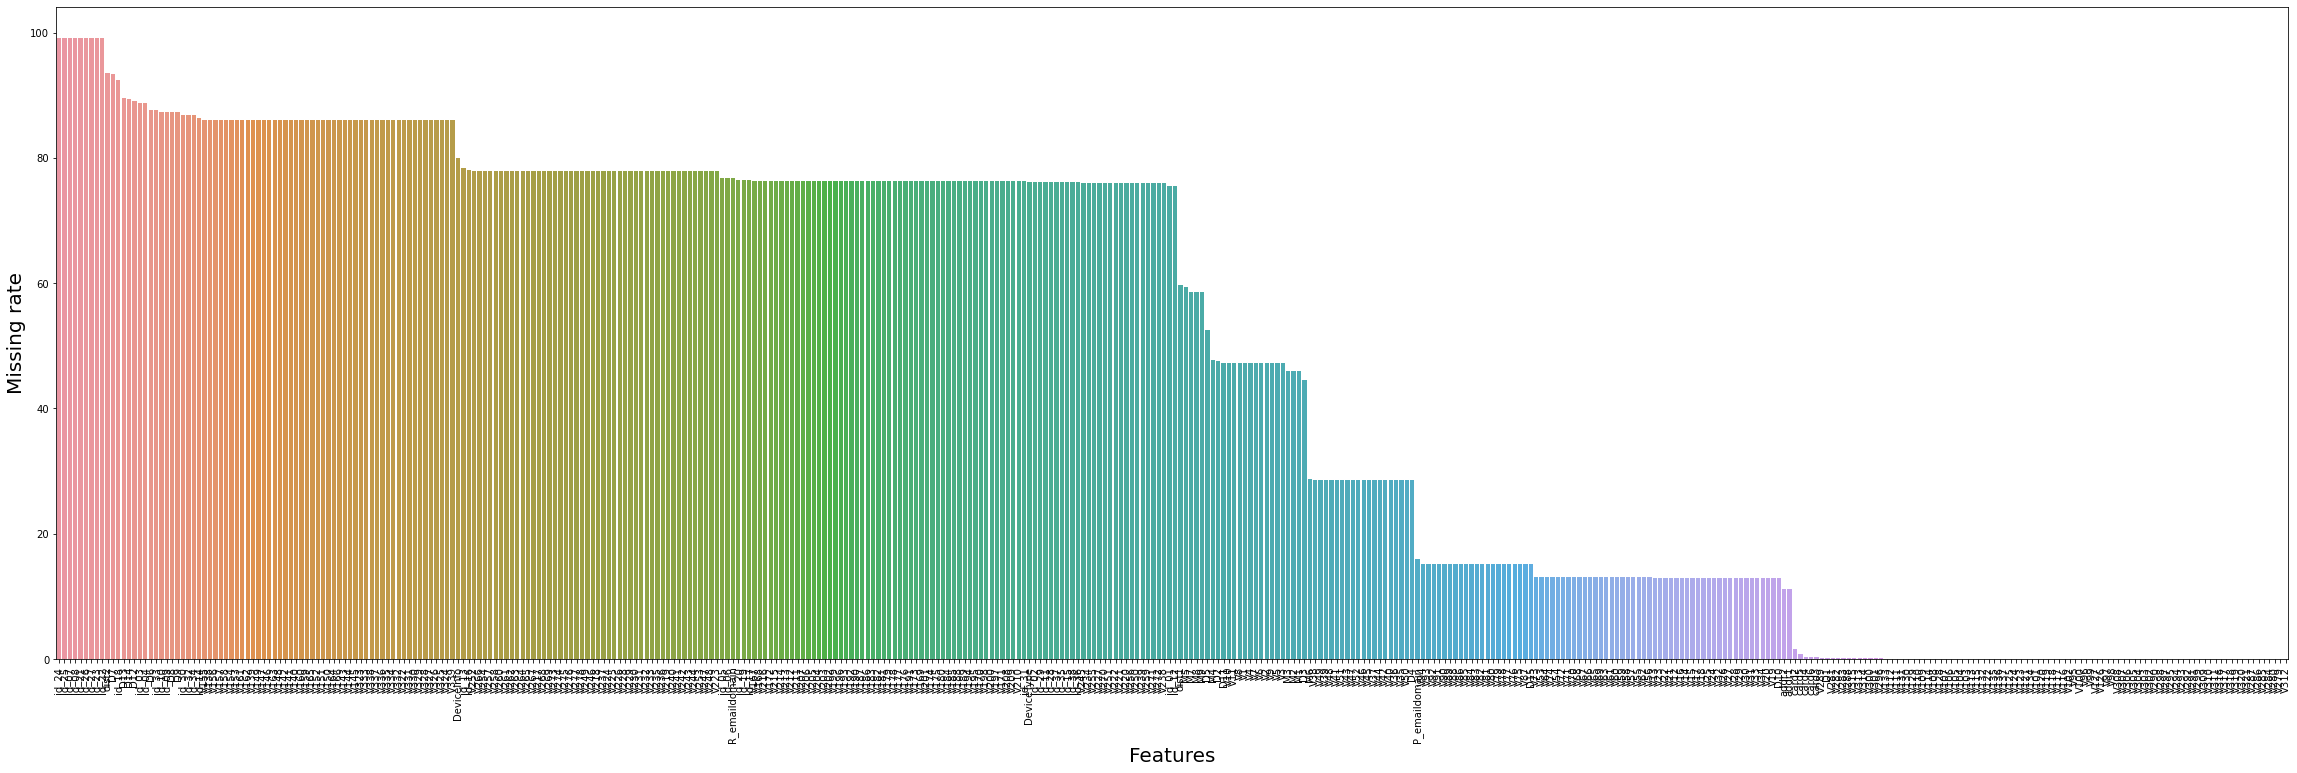

In [27]:
plt.subplots(figsize=(40,12))
plt.xticks(rotation='90')
sns.barplot(null_variables.index, null_variables)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

In [28]:
# TransactionDT

<AxesSubplot:xlabel='hour', ylabel='percentage'>

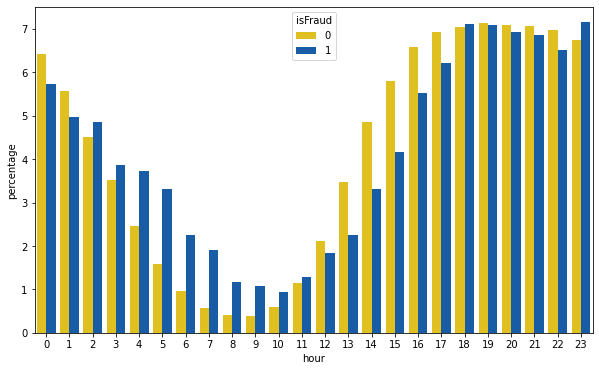

In [29]:
train_df['hour'] = (train_df['TransactionDT']//(3600))%24
test_df['hour'] = (test_df['TransactionDT']//(3600))%24

train_hour = (train_df.groupby(['isFraud'])['hour']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hour'))

plt.subplots(figsize=(10,6))
sns.barplot(x="hour", y="percentage", hue="isFraud", data=train_hour, palette=["#FFD500", "#005BBB"])

In [30]:
# card4 column 시각화

Text(0.5, 1.0, 'Test')

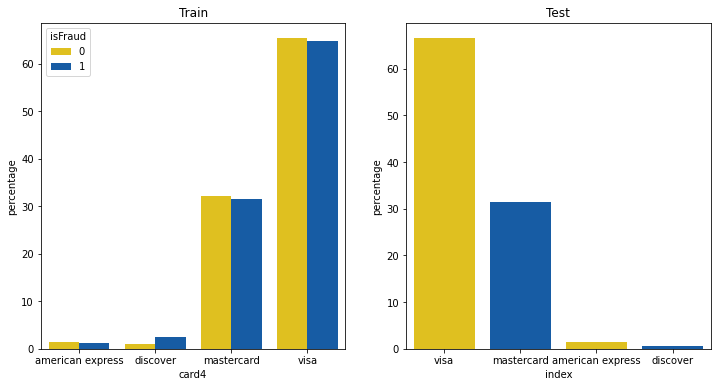

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card4 = (train_df[~train_df['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4, palette=["#FFD500", "#005BBB"])
plt.title('Train')
plt.subplot(1,2,2)
test_card4 =test_df[~test_df['card4'].isnull()]['card4'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x="index", y="percentage", data=test_card4, palette=["#FFD500", "#005BBB"])
plt.title('Test')